In [12]:
import pandas as pd
import numpy as np

In [27]:
companies = pd.read_csv("Datasets/companies.csv", encoding='palmos')
round2 = pd.read_csv("Datasets/rounds2.csv", encoding='palmos')

In [28]:
print(companies.isnull().sum())
print(companies.shape)

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64
(66368, 10)


In [29]:
print(round2.isnull().sum())
print(round2.shape)

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64
(114949, 6)


In [54]:
companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/organization/ã”asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/organization/ä°novatiff-reklam-ve-tanä±tä±m-h...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


In [33]:
round2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [46]:
companies.permalink = companies.permalink.apply(lambda x : x.lower())
round2.company_permalink = round2.company_permalink.apply(lambda x : x.lower())
round2.company_permalink = round2.company_permalink.apply(lambda x : x.strip(" "))

In [47]:
round2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [48]:
round2.company_permalink.unique().shape

(66368,)

##### Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

In [49]:
companies['permalink'].isin(round2["company_permalink"]).value_counts() #N

True    66368
Name: permalink, dtype: int64

In [45]:
companies[companies['permalink'] == '/Organization/-Fame']

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN


In [96]:
round2.rename(columns={"company_permalink": "permalink"}, inplace=True)
result = pd.merge(round2, companies, on = "permalink")

In [97]:
result.shape

(114949, 15)

In [98]:
result.tail()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
114947,/organization/ã”asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
114948,/organization/ä°novatiff-reklam-ve-tanä±tä±m-h...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


In [99]:
result["funding_round_type"].unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

In [100]:
result.raised_amount_usd.sum()

990125085135.0

In [133]:
investment_type = ['venture', 'seed', 'angel', 'private_equity']
df2 = result[result["funding_round_type"].isin(investment_type)]

In [134]:
df2.funding_round_type.unique()
df2.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

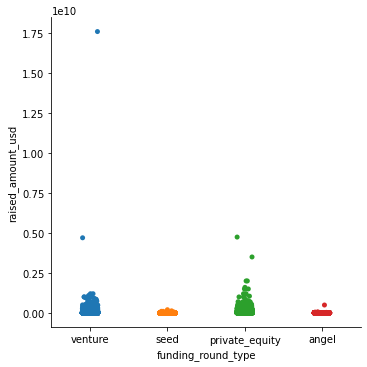

In [136]:
sns.catplot(data = df2, x=df2['funding_round_type'], y= df2['raised_amount_usd'])

In [137]:
df2.shape 

(94397, 15)

In [138]:
df2 = df2[df2["raised_amount_usd"].notna()]

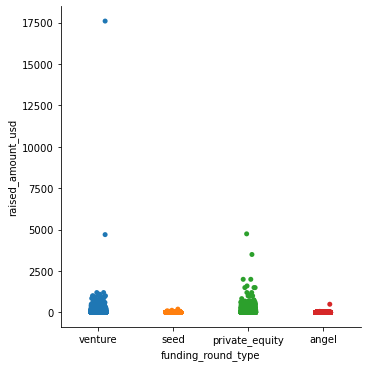

In [147]:
sns.catplot(data = df2, x=df2['funding_round_type'], y= df2['raised_amount_usd']/1000000)

In [151]:
df2.groupby(['funding_round_type'])['raised_amount_usd'].max()

funding_round_type
angel             4.945120e+08
private_equity    4.745460e+09
seed              2.000000e+08
venture           1.760000e+10
Name: raised_amount_usd, dtype: float64

In [155]:
df2 = df2[df2['raised_amount_usd'] < 6000000000]

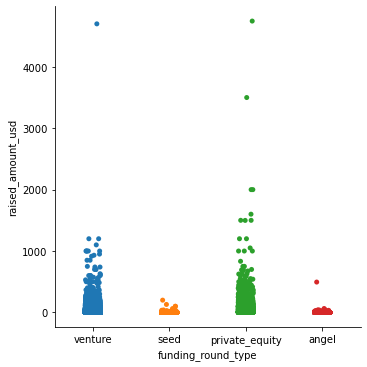

In [156]:
sns.catplot(data = df2, x=df2['funding_round_type'], y= df2['raised_amount_usd']/1000000)

In [196]:
df2 = df2.loc[(df2['raised_amount_usd'] <= 15000000) & (df2['raised_amount_usd'] >= 5000000)]
print(df2.groupby(['funding_round_type'])['raised_amount_usd'].sum())
print(df2.groupby(['funding_round_type'])['raised_amount_usd'].mean())

funding_round_type
angel             5.192895e+08
private_equity    3.982620e+09
seed              1.341915e+09
venture           1.475322e+11
Name: raised_amount_usd, dtype: float64
funding_round_type
angel             7.212355e+06
private_equity    9.283496e+06
seed              6.610420e+06
venture           8.888551e+06
Name: raised_amount_usd, dtype: float64


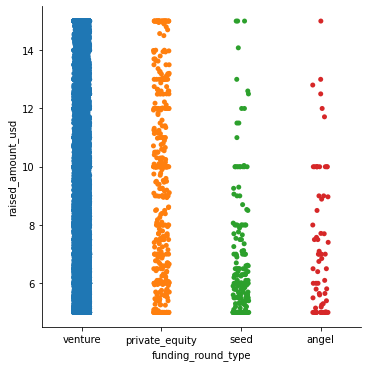

In [202]:
sns.catplot(data = df2, x=df2['funding_round_type'], y= df2['raised_amount_usd']/1000000)

In [198]:
(df2["funding_round_type"] == "venture").value_counts()

True     16598
False      704
Name: funding_round_type, dtype: int64

In [199]:
(df2["funding_round_type"] == "private_equity").value_counts()

False    16873
True       429
Name: funding_round_type, dtype: int64

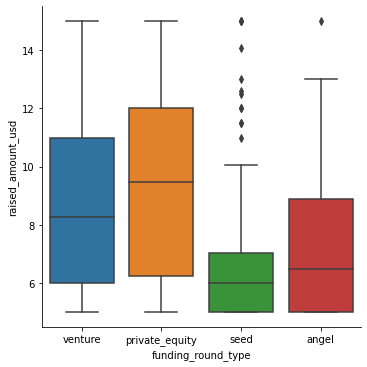

In [200]:
sns.catplot(data = df2, x=df2['funding_round_type'], y= df2['raised_amount_usd']/1000000, kind="box")